In [35]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import re

In [41]:
matplotlib.use('cairo')

In [36]:
size = 15
params = {'legend.fontsize': 'large',
          'figure.figsize': (20,10),
          'axes.labelsize': 25,
          'axes.titlesize': 25,
          'xtick.labelsize': size*1.25,
          'ytick.labelsize': size*1.25,
          'axes.titlepad': 25}
plt.rcParams['font.sans-serif'] = ['Avenir', 'sans-serif']
plt.rcParams.update(params)

# Exploratory data analysis 

## Medical text dataset

In [3]:
DATA_TRAIN = '../data/medical-text/train.dat'
DATA_TEST = '../data/medical-text/test.dat'

## TRAIN DATA

In [4]:
comments = open(DATA_TRAIN, 'rb').readlines()

In [5]:
def split_tab(comment):
    return comment.decode(encoding='utf-8').split('\t')[1]

In [6]:
comments_clean = list(map(split_tab, comments))

In [7]:
comments_clean = ' '.join(comments_clean)

In [8]:
print(f'Length of text: {len(comments_clean)} characters')

Length of text: 17797244 characters


In [9]:
sentences = comments_clean.split(' \n ')

In [10]:
avg_char = list(map(len, sentences))

In [11]:
print('Average no of caracters per comment: {}'.format(np.average(avg_char)))

Average no of caracters per comment: 1229.6670591494667


In [12]:
def len_tokens(com):
    a = com.split(' ')
    return len(a)

In [13]:
avg_tokens = list(map(len_tokens, sentences))

In [14]:
print('Average no of tokens per comment: {}'.format(np.average(avg_tokens)))

Average no of tokens per comment: 179.9371796647735


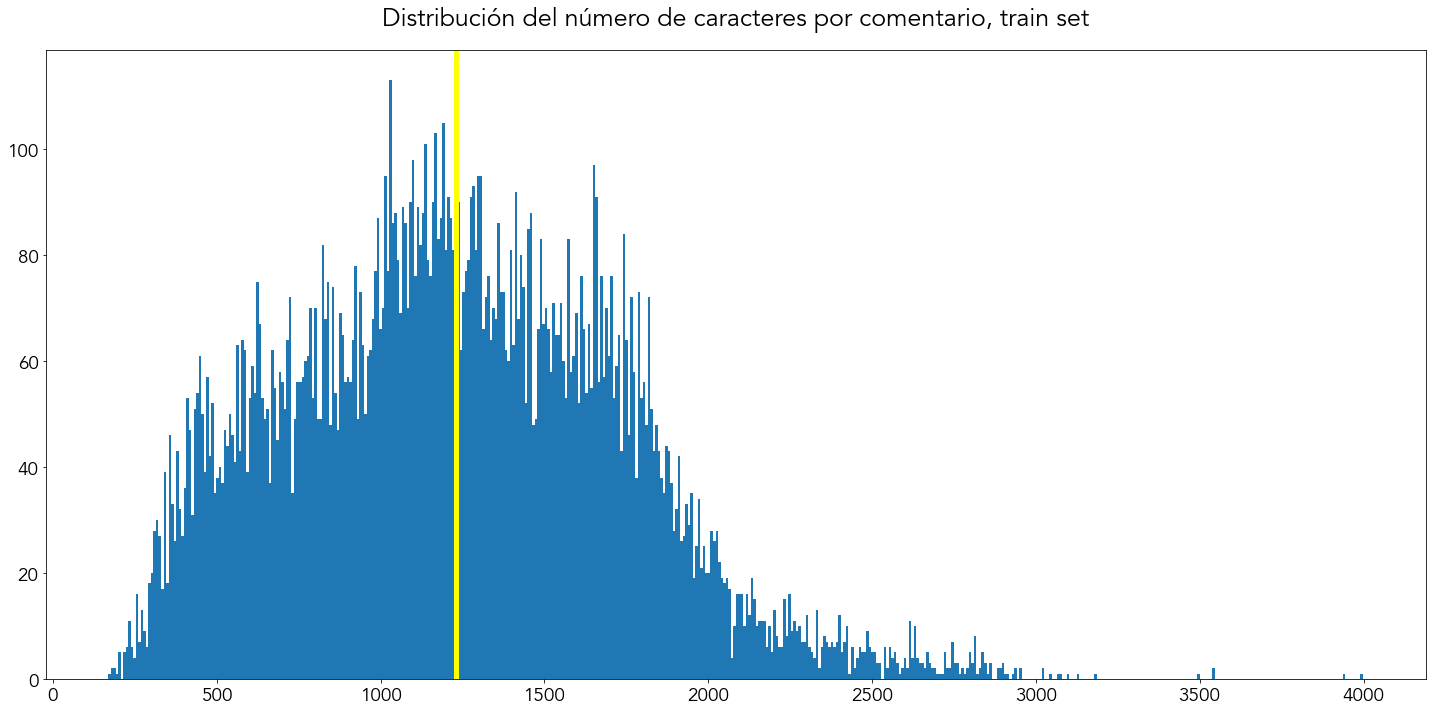

In [19]:
plt.figure(figsize=(20, 10))
plt.hist(avg_char, bins=500)
plt.title('Distribución del número de caracteres por comentario, train set')
plt.axvline(np.average(avg_char), color='yellow', linewidth=5)
plt.tight_layout()
#plt.savefig('media/char_hist_train.pdf')


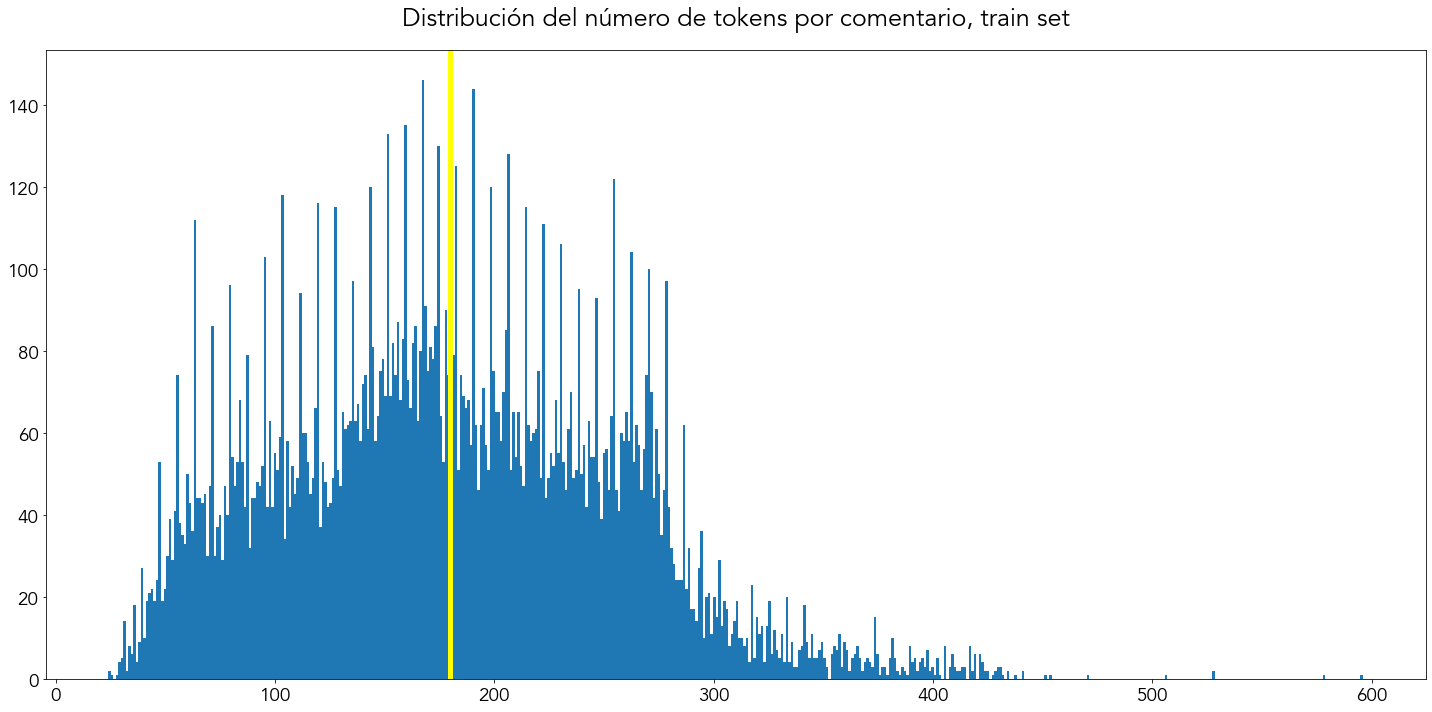

In [20]:
plt.figure(figsize=(20, 10))
plt.hist(avg_tokens, bins=500)
plt.title('Distribución del número de tokens por comentario, train set')
plt.axvline(np.average(avg_tokens), color='yellow', linewidth=5)
plt.tight_layout()
#plt.savefig('media/tokens_hist_train.pdf')

## TEST DATA 

In [18]:
comments = open(DATA_TEST, 'rb').readlines()

In [19]:
def split_tab(comment):
    return comment.decode(encoding='utf-8')

In [20]:
comments_clean = list(map(split_tab, comments))

In [21]:
comments_clean = ' '.join(comments_clean)

In [22]:
print(f'Length of text: {len(comments_clean)} characters')

Length of text: 18258642 characters


In [23]:
sentences = comments_clean.split(' \n ')

In [24]:
avg_char = list(map(len, sentences))

In [25]:
print('Average no of caracters per comment: {}'.format(np.average(avg_char)))

Average no of caracters per comment: 1261.2739925218114


In [24]:
def len_tokens(com):
    a = com.split(' ')
    return len(a)

In [27]:
avg_tokens = list(map(len_tokens, sentences))

In [28]:
print('Average no of tokens per comment: {}'.format(np.average(avg_tokens)))

Average no of tokens per comment: 184.29171859853207


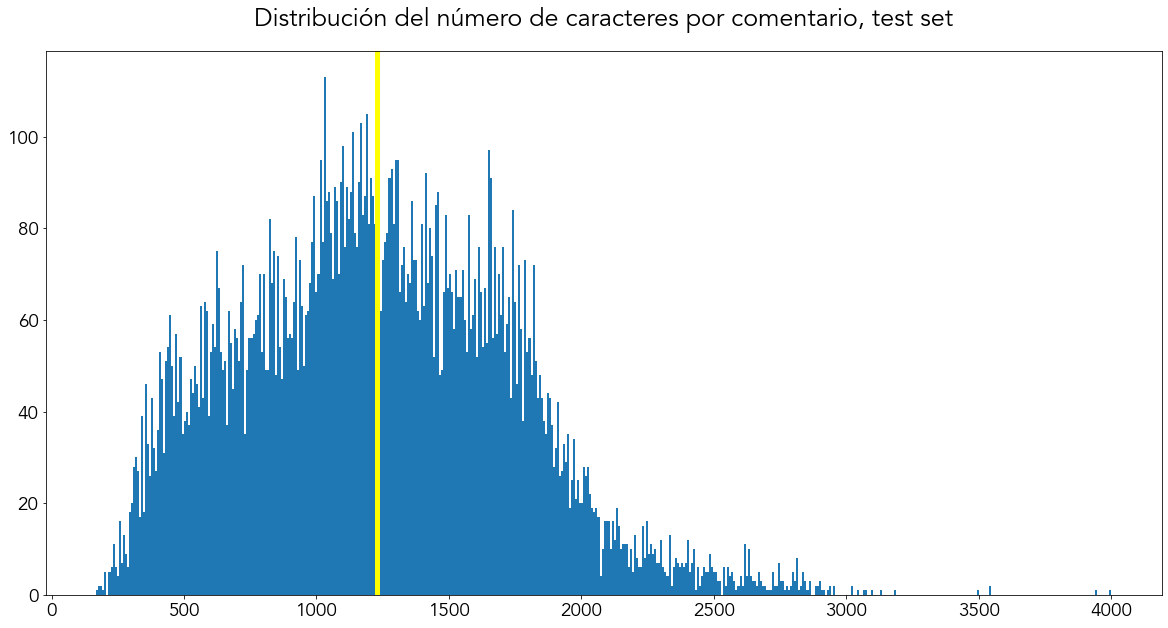

In [17]:
plt.figure(figsize=(20, 10))
plt.hist(avg_char, bins=500)
plt.title('Distribución del número de caracteres por comentario, test set')
plt.axvline(np.average(avg_char), color='yellow', linewidth=5)
# plt.tight_layout()
#plt.savefig('media/char_hist_test.pdf')
plt.show()

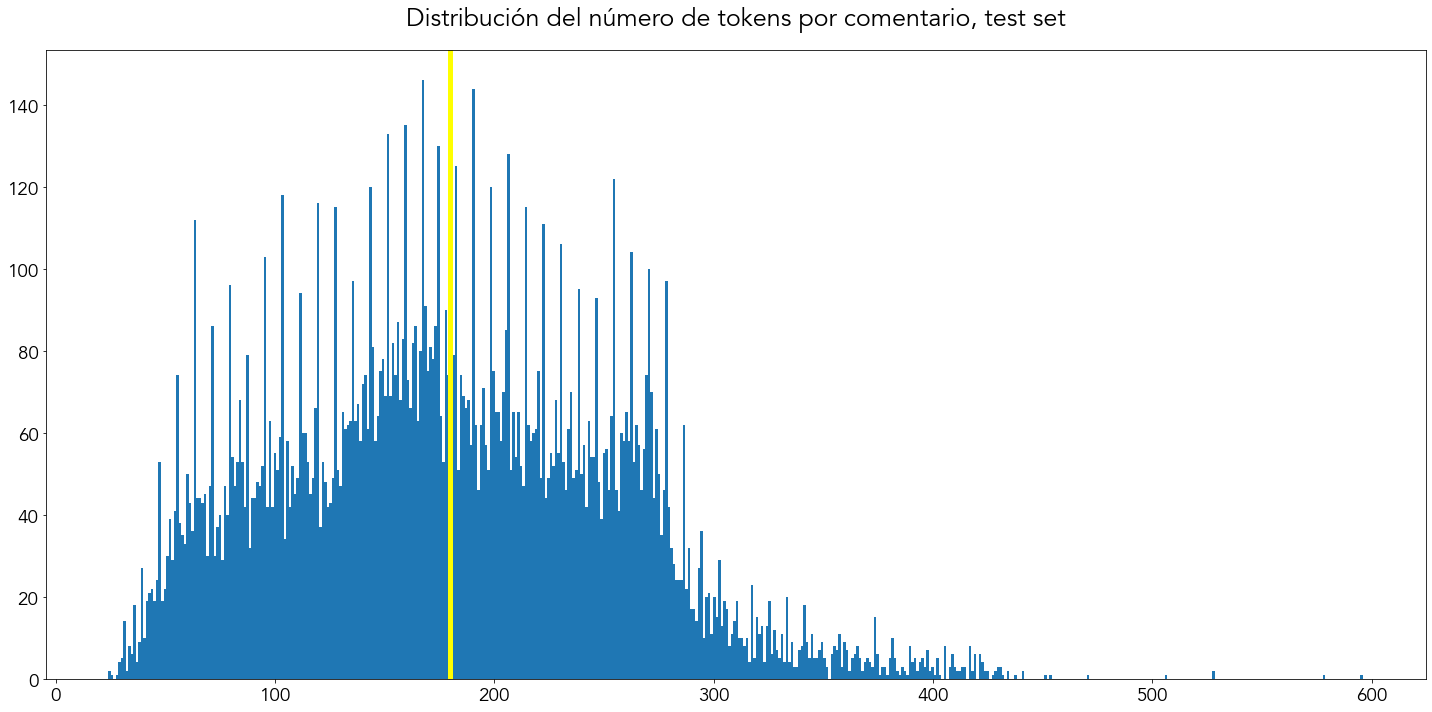

In [16]:
plt.figure(figsize=(20, 10))
plt.hist(avg_tokens, bins=500)
plt.title('Distribución del número de tokens por comentario, test set')
plt.axvline(np.average(avg_tokens), color='yellow', linewidth=5)
plt.tight_layout()
plt.show()
# plt.savefig('media/tokens_hist_test.pdf')

## MTSamples.csv dataset

In [4]:
import pandas as pd

In [5]:
MTSAMPLES = '../data/mtsamples.csv'

In [6]:
data = pd.read_csv(MTSAMPLES, index_col=0)

In [7]:
data.head()

,description,medical_specialty,sample_name,transcription,keywords
0,A 23-year-old white female presents with comp...,Allergy / Immunology,Allergic Rhinitis,"SUBJECTIVE:, This 23-year-old white female pr...","allergy / immunology, allergic rhinitis, aller..."
1,Consult for laparoscopic gastric bypass.,Bariatrics,Laparoscopic Gastric Bypass Consult - 2,"PAST MEDICAL HISTORY:, He has difficulty climb...","bariatrics, laparoscopic gastric bypass, weigh..."
2,Consult for laparoscopic gastric bypass.,Bariatrics,Laparoscopic Gastric Bypass Consult - 1,"HISTORY OF PRESENT ILLNESS: , I have seen ABC ...","bariatrics, laparoscopic gastric bypass, heart..."
3,2-D M-Mode. Doppler.,Cardiovascular / Pulmonary,2-D Echocardiogram - 1,"2-D M-MODE: , ,1. Left atrial enlargement wit...","cardiovascular / pulmonary, 2-d m-mode, dopple..."
4,2-D Echocardiogram,Cardiovascular / Pulmonary,2-D Echocardiogram - 2,1. The left ventricular cavity size and wall ...,"cardiovascular / pulmonary, 2-d, doppler, echo..."


In [8]:

med_text = data[data.transcription.notna()].transcription

In [9]:
med_text[0]

'SUBJECTIVE:,  This 23-year-old white female presents with complaint of allergies.  She used to have allergies when she lived in Seattle but she thinks they are worse here.  In the past, she has tried Claritin, and Zyrtec.  Both worked for short time but then seemed to lose effectiveness.  She has used Allegra also.  She used that last summer and she began using it again two weeks ago.  It does not appear to be working very well.  She has used over-the-counter sprays but no prescription nasal sprays.  She does have asthma but doest not require daily medication for this and does not think it is flaring up.,MEDICATIONS: , Her only medication currently is Ortho Tri-Cyclen and the Allegra.,ALLERGIES: , She has no known medicine allergies.,OBJECTIVE:,Vitals:  Weight was 130 pounds and blood pressure 124/78.,HEENT:  Her throat was mildly erythematous without exudate.  Nasal mucosa was erythematous and swollen.  Only clear drainage was seen.  TMs were clear.,Neck:  Supple without adenopathy.,

## REGEX PROCESSING

Let us clean the text before doing anything else.

In [19]:
def regex_processing(text):
    # Remove capital letters surrounded by 0 or more `,` and a colon, i.e. the titles
    no_caps = re.sub(r',*([A-Z\s]+):', '', text)

    # Remove weirdly positioned commas. Find commas that dont have any letter before and some space after them.
    weird_commas = re.sub(r'(?<!\w),\s+', '', no_caps)
    
    # Remove commas that dont have spaces around them. (Commas should always have a trailing space after them)
    more_commas = re.sub(r'(?<!\s),(?!\s)', ' ', weird_commas)

    # Remove digits adyacent to dots or commas, as in enumerated lists.
    no_digits = re.sub(r'[\.,]*\d[\.,]+', ' ', more_commas)

    # Remove any other commas left behind the process. Particularly these cases: Hello. ,How are you?
    trailing_commas = re.sub(r'\s,(?=[A-Z\d])', '', no_digits)

    # Substitute any number of spaces for 1 single space.
    no_double_spaces = re.sub(r'\s+', ' ', trailing_commas)

    # Solve these problems: Hello .How are you? => Hello. How are you?
    final_text = re.sub(r'(?<!\s)\.(?!\s)', '. ', no_double_spaces)

    # Finally, strip the text from any trailing commas or white spaces.
    # The result is hopefully a clean version of the text, ready to be tokenized
    # and passed to the models.
    return final_text.strip(', ')



In [20]:
processed_trascriptions = list(map(regex_processing, med_text))

In [23]:
processed_trascriptions[0]

'This 23-year-old white female presents with complaint of allergies. She used to have allergies when she lived in Seattle but she thinks they are worse here. In the past, she has tried Claritin, and Zyrtec. Both worked for short time but then seemed to lose effectiveness. She has used Allegra also. She used that last summer and she began using it again two weeks ago. It does not appear to be working very well. She has used over-the-counter sprays but no prescription nasal sprays. She does have asthma but doest not require daily medication for this and does not think it is flaring up. Her only medication currently is Ortho Tri-Cyclen and the Allegra. She has no known medicine allergies. Vitals: Weight was 130 pounds and blood pressure 124/7 Her throat was mildly erythematous without exudate. Nasal mucosa was erythematous and swollen. Only clear drainage was seen. TMs were clear. Neck: Supple without adenopathy. Lungs: Clear. Allergic rhinitis. She will try Zyrtec instead of Allegra agai

In [25]:
avg_tokens_tr = list(map(len_tokens, processed_trascriptions))

In [28]:
avg_chars_tr = list(map(len, processed_trascriptions))

In [27]:
np.average(avg_tokens_tr)


458.76419653644786

In [29]:
np.average(avg_chars_tr)

2862.3626661296817

<ipython-input-44-b6bf1655e8cc>:5: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "dpi" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.tight_layout()
<ipython-input-44-b6bf1655e8cc>:7: UserWarning: Matplotlib is currently using cairo, which is a non-GUI backend, so cannot show the figure.
  plt.show()


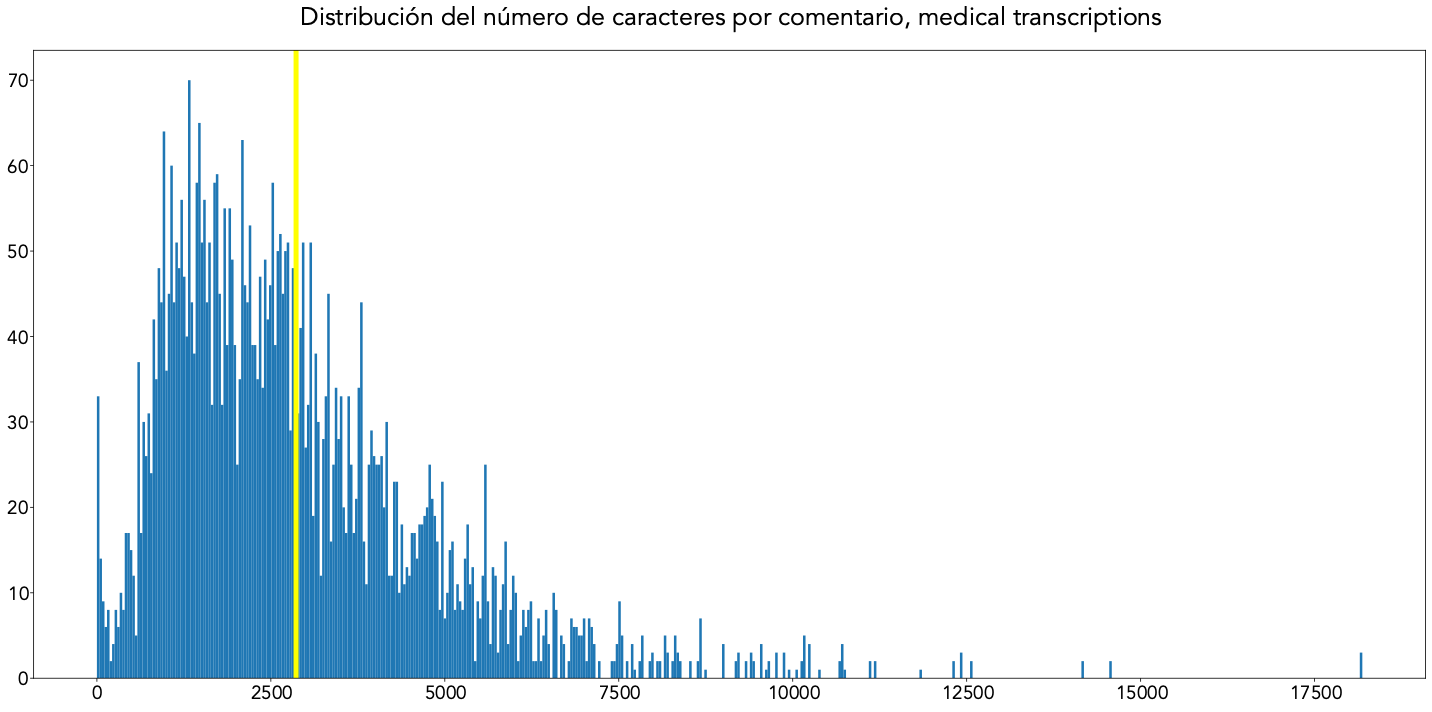

In [44]:
plt.figure(figsize=(20, 10))
plt.hist(avg_chars_tr, bins=500)
plt.title('Distribución del número de caracteres por comentario, medical transcriptions')
plt.axvline(np.average(avg_chars_tr), color='yellow', linewidth=5)
plt.tight_layout()
plt.savefig('media/char_hist_mdtr.pdf')
plt.show()

<ipython-input-45-e8c9529fb80a>:5: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "dpi" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.tight_layout()
<ipython-input-45-e8c9529fb80a>:7: UserWarning: Matplotlib is currently using cairo, which is a non-GUI backend, so cannot show the figure.
  plt.show()


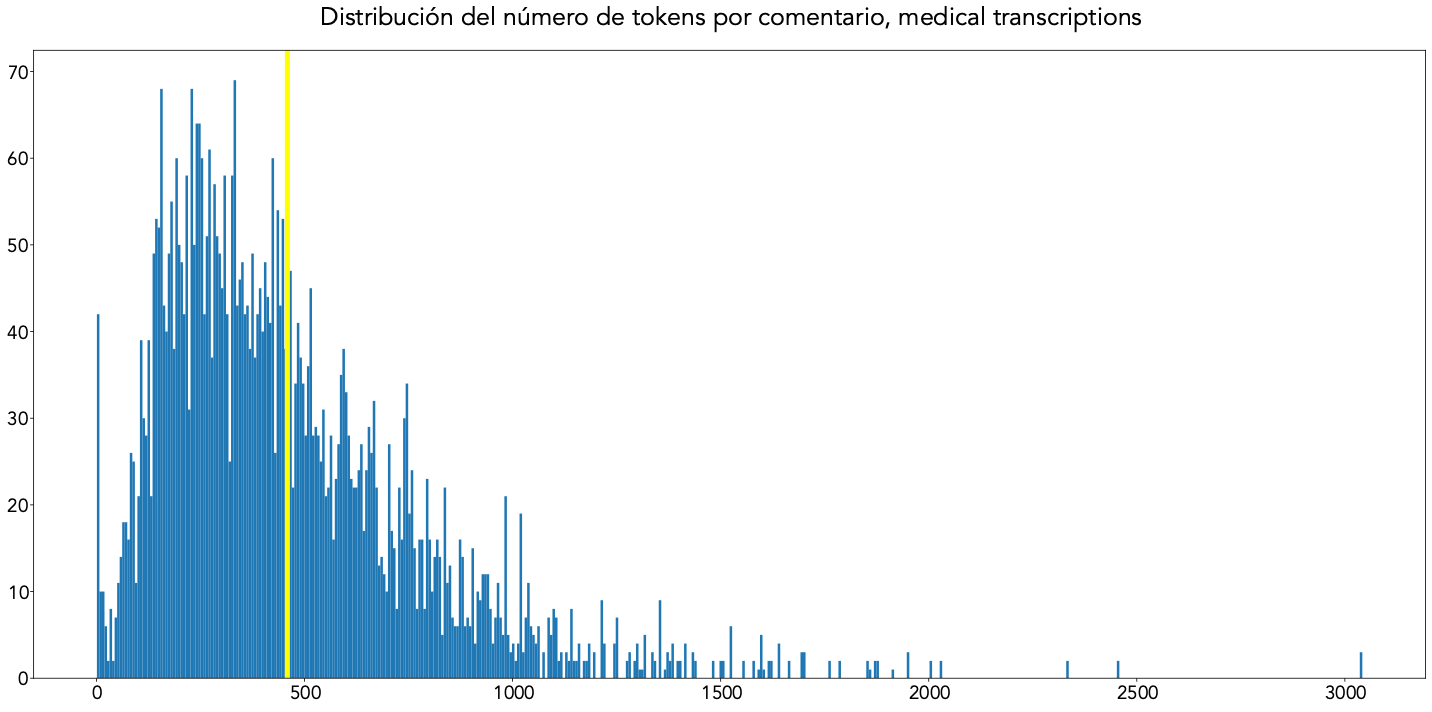

In [45]:
plt.figure(figsize=(20, 10))
plt.hist(avg_tokens_tr, bins=500)
plt.title('Distribución del número de tokens por comentario, medical transcriptions')
plt.axvline(np.average(avg_tokens_tr), color='yellow', linewidth=5)
plt.tight_layout()
plt.savefig('media/token_hist_mdtr.pdf')
plt.show()